In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates


In [2]:
def data_download(ticker, date, interval):
    start_date = pd.to_datetime(date)
    end_date = start_date + pd.Timedelta(days= 1)
    # data = yf.download(ticker, start= start_date, interval=interval)
    data = yf.download(ticker, start= start_date,end=end_date, interval=interval)
    return data



In [3]:
print("Test Case 1: GOOG (5m interval)")
data1 = data_download("GOOG", "2025-02-06,", "5m")
print(data1.head())
print()

print("Test Case 2: AAPL (15m interval)")
data2 = data_download("AAPL", "2025-02-07", "15m")
print(data2.head())

Test Case 1: GOOG (5m interval)


/opt/miniconda3/lib/python3.12/site-packages/charset_normalizer/api.py:105: UserWarning: Trying to detect encoding from a tiny portion of (23) byte(s).
  warn('Trying to detect encoding from a tiny portion of ({}) byte(s).'.format(length))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOG']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, GOOG), (Close, GOOG), (High, GOOG), (Low, GOOG), (Open, GOOG), (Volume, GOOG)]
Index: []

Test Case 2: AAPL (15m interval)


/opt/miniconda3/lib/python3.12/site-packages/charset_normalizer/api.py:105: UserWarning: Trying to detect encoding from a tiny portion of (23) byte(s).
  warn('Trying to detect encoding from a tiny portion of ({}) byte(s).'.format(length))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


In [4]:
def volume_analysis(data, ticker, date, interval):
   
    fig = plt.figure(figsize=(8,4))
    plt.bar(data.index, data[("Volume", ticker)], label= "Volume", color= "blue")

    plt.title(f'Volume Analysis of {ticker} on {date} {interval}')
    plt.xlabel("Time")
    plt.ylabel("Volume")
    plt.legend(loc = "upper right")
    fig.tight_layout()
    plt.show()


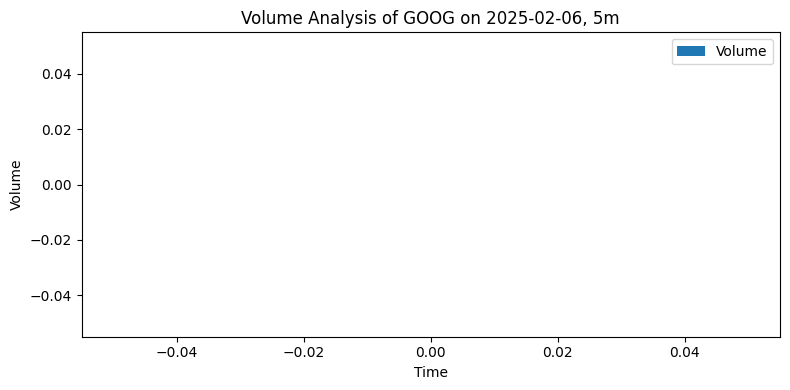

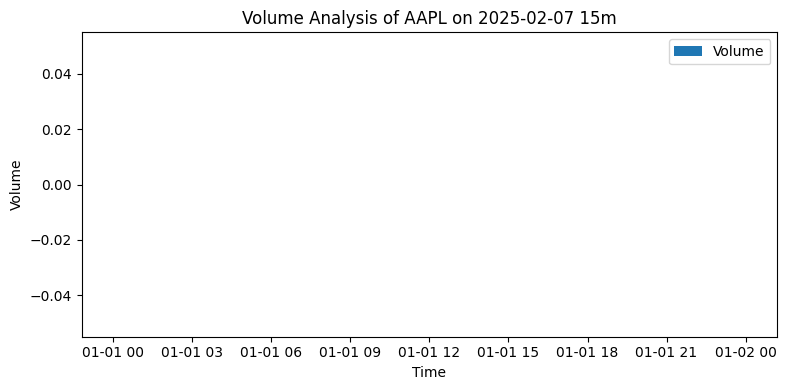

In [5]:
# I am using predownloaded data from Question 1
volume_analysis(data1, "GOOG", "2025-02-06,", "5m")
volume_analysis(data2, "AAPL", "2025-02-07", "15m")


In [6]:
def price_analysis(data, ticker, date, interval):
    mean_prices = data[["Close", "High", "Low", "Open"]].mean(axis=1)

    fig = plt.figure(figsize= (12,6))
    plt.plot(data.index, mean_prices, color="red", label= "Average Price")
    plt.plot(data.index, data["Close"], color="blue", label="Close", alpha=0.5)

    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title(f"Price Analysis for {ticker} on {date} {interval}")
    plt.grid()
    plt.show()
    


    return 


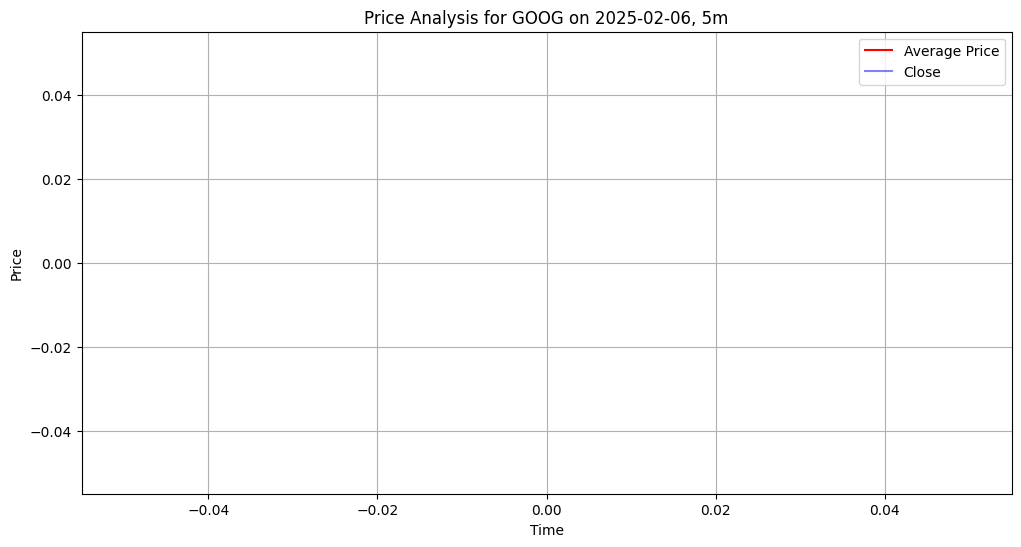

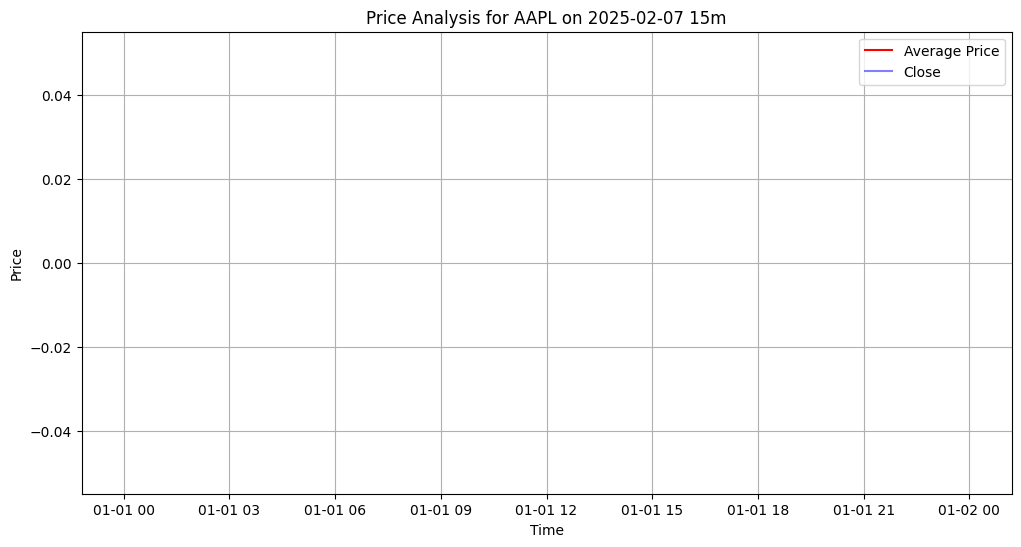

In [7]:
# I am using predownloaded data from Question 1
price_analysis(data1, "GOOG", "2025-02-06,", "5m")
price_analysis(data2, "AAPL", "2025-02-07", "15m")



In [8]:
def violin_plots(data, ticker, date, interval):

    fig = plt.figure(figsize=(8, 5))  

    price_columns = ["Close", "Open", "Low", "High"]
    
    price_data = [data[col].squeeze() for col in price_columns]

    positions = [1,2,3,4]

    plt.violinplot(price_data, positions=positions, widths=0.7) 

    plt.xticks(positions, price_columns)  

    plt.title(f"Violin Plot of {ticker} Prices on {date} ({interval})")
    plt.ylabel("Price")

    plt.grid()
    plt.show()
    return 

ValueError: zero-size array to reduction operation minimum which has no identity

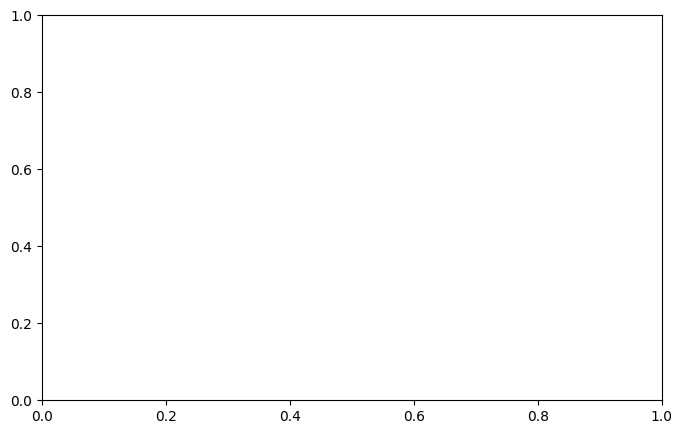

In [9]:
# I am using predownloaded data from Question 1
violin_plots(data1, "GOOG", "2025-02-06,", "5m")
violin_plots(data2, "AAPL", "2025-02-07", "15m")

